# CNN for MNIST dataset

In [6]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Model

import matplotlib.pyplot as plt

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

2025-04-22 00:43:31.570086: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


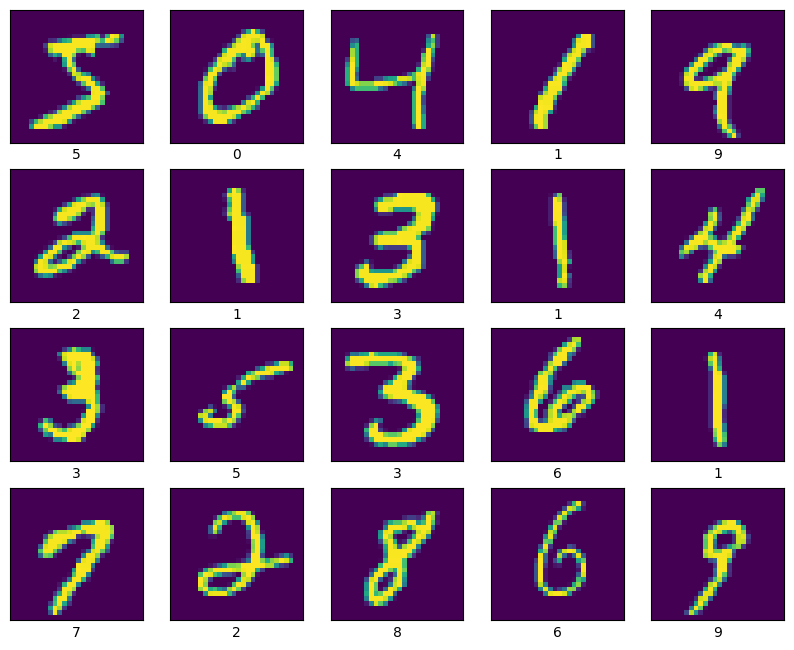

In [9]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(10, activation='softmax')
])

/home/tomadavid/tensor/tensor/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.1, verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9022 - loss: 0.3191 - val_accuracy: 0.9882 - val_loss: 0.0436
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9844 - loss: 0.0485 - val_accuracy: 0.9908 - val_loss: 0.0370
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9898 - val_loss: 0.0408
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.9918 - val_loss: 0.0360
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9905 - val_loss: 0.0326
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9962 - loss: 0.0102 - val_accuracy: 0.9908 - val_loss: 0.0377
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9905 - val_loss: 0.0440
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9976 -

In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 6ms/step - accuracy: 0.9918 - loss: 0.0321


In [16]:
test_acc

0.9918000102043152

In [15]:
import os.path

if os.path.isfile('tensor/mnist.h5') is False:
    model.save('tensor/mnist.h5')